**CSE 303 Project On Soil Data Grevena**

---




In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_csv = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/SOIL DATA GR.xlsx')

In [4]:
df_csv

,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,1,42.0,38.0,20.0,5.162,0.274,3.783414,0.00,14.462366,18.608840,147,1115,91.32,0.894,27.060,1.768,0.40
1,2,54.0,26.0,20.0,6.071,0.355,1.451688,0.00,14.587814,32.742137,180,1055,60.04,3.660,17.580,1.684,0.41
2,3,28.0,36.0,36.0,6.921,0.675,1.767599,0.40,14.910394,19.024525,183,1215,61.24,3.060,18.000,1.840,0.46
3,4,58.0,20.0,22.0,7.704,0.355,0.718322,6.80,4.211470,6.276846,116,327,19.54,1.640,5.040,0.844,0.50
4,5,33.2,41.2,25.6,7.609,0.392,0.996625,4.39,6.111111,6.553970,228,939,25.84,0.180,7.160,1.216,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,777,26.0,46.0,28.0,6.720,0.454,2.080000,0.00,7.660000,20.670000,395,500,38.07,0.394,26.480,1.468,0.33
777,778,40.0,28.0,32.0,7.790,0.343,1.380000,30.00,5.200000,4.140000,286,154,12.79,0.241,6.328,0.603,0.12
778,779,34.0,28.0,38.0,7.630,1.135,1.870000,24.30,17.130000,6.900000,582,164,10.73,0.439,5.390,1.141,0.26
779,780,16.0,38.0,46.0,7.730,0.393,1.720000,46.30,3.920000,7.930000,335,572,11.61,0.263,3.770,2.195,0.27


In [5]:
#Removing Garbage Columns
df=df_csv.drop('ID',axis=1)
df.head()

,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,42.0,38.0,20.0,5.162,0.274,3.783414,0.00,14.462366,18.608840,147,1115,91.32,0.894,27.06,1.768,0.40
1,54.0,26.0,20.0,6.071,0.355,1.451688,0.00,14.587814,32.742137,180,1055,60.04,3.660,17.58,1.684,0.41
2,28.0,36.0,36.0,6.921,0.675,1.767599,0.40,14.910394,19.024525,183,1215,61.24,3.060,18.00,1.840,0.46
3,58.0,20.0,22.0,7.704,0.355,0.718322,6.80,4.211470,6.276846,116,327,19.54,1.640,5.04,0.844,0.50
4,33.2,41.2,25.6,7.609,0.392,0.996625,4.39,6.111111,6.553970,228,939,25.84,0.180,7.16,1.216,0.40


In [6]:
df.isnull().sum()

,0
Sand %,0
Clay %,0
Silt %,0
pH,0
EC mS/cm,0
O.M. %,0
CACO3 %,0
N_NO3 ppm,0
P ppm,0
K ppm,0


In [7]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Mn ppm'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 65
max outlier value: 189.21
min outlier value: 37.86


In [8]:
# Finding mean value
mean_val = df['Mn ppm'].mean()
print(mean_val)

# Replacing null with mean value
df['Mn ppm'] = df['Mn ppm'].fillna(mean_val)


15.870456717948718


In [9]:
df.isnull().sum()

,0
Sand %,0
Clay %,0
Silt %,0
pH,0
EC mS/cm,0
O.M. %,0
CACO3 %,0
N_NO3 ppm,0
P ppm,0
K ppm,0


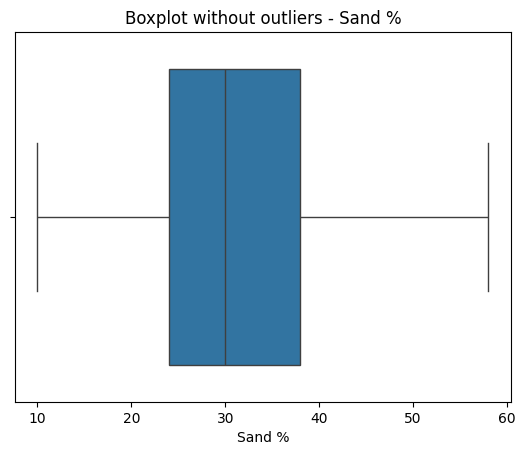

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
1      54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
..      ...     ...     ...    ...       ...       ...      ...        ...   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

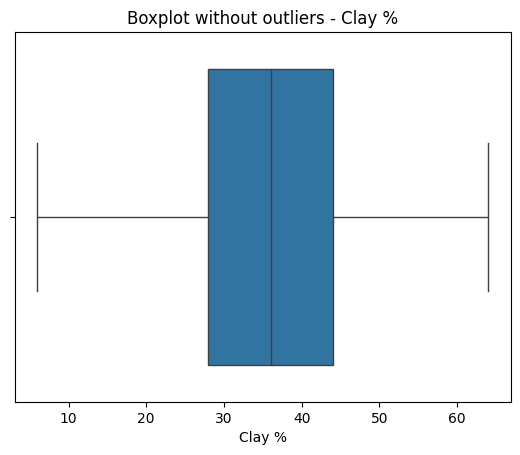

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
1      54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
..      ...     ...     ...    ...       ...       ...      ...        ...   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

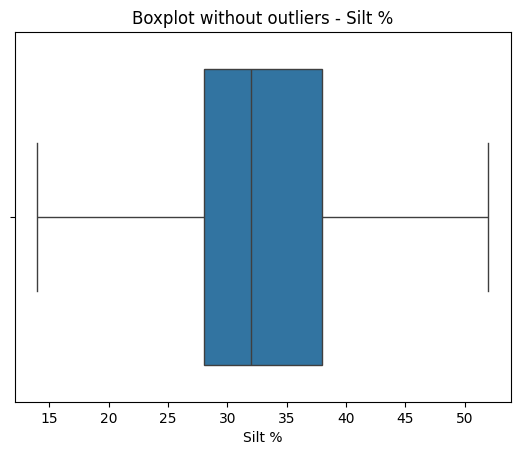

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
1      54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
..      ...     ...     ...    ...       ...       ...      ...        ...   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

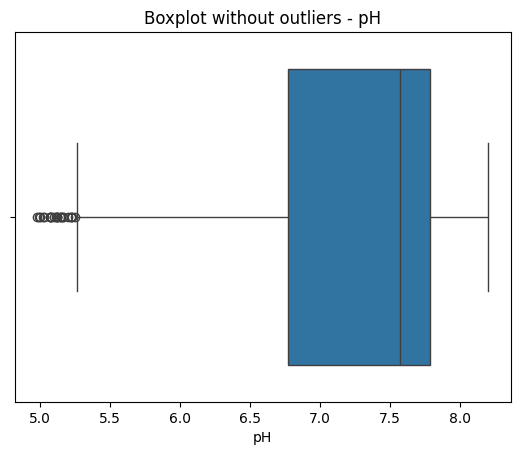

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
1      54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
..      ...     ...     ...    ...       ...       ...      ...        ...   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

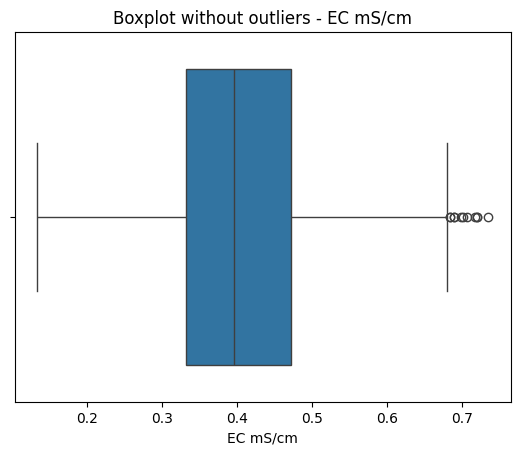

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
1      54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
..      ...     ...     ...    ...       ...       ...      ...        ...   
775    44.0    34.0    22.0  7.720     0.430  1.420000    27.00   4.320000   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

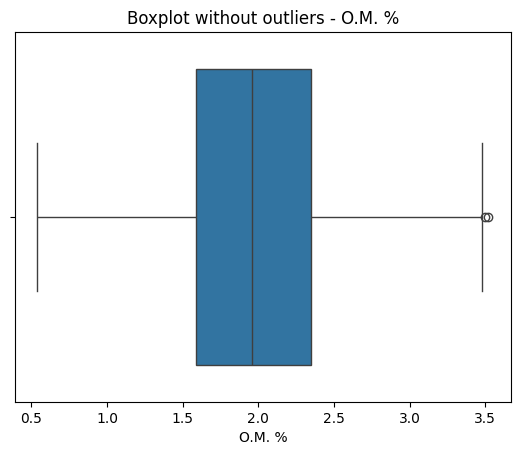

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
1      54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
5      29.2    46.8    24.0  6.504     0.349  0.943973     0.00   6.021505   
..      ...     ...     ...    ...       ...       ...      ...        ...   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

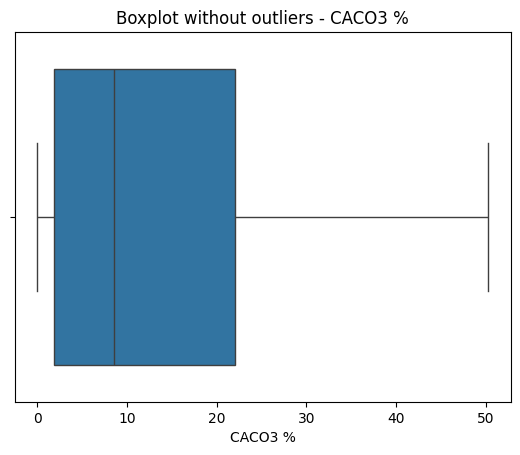

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
1      54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
..      ...     ...     ...    ...       ...       ...      ...        ...   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

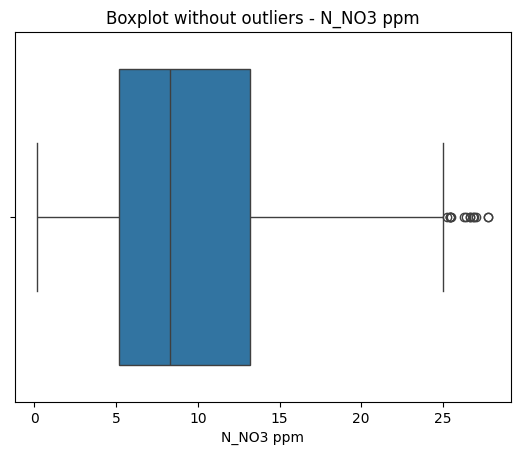

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
1      54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
..      ...     ...     ...    ...       ...       ...      ...        ...   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

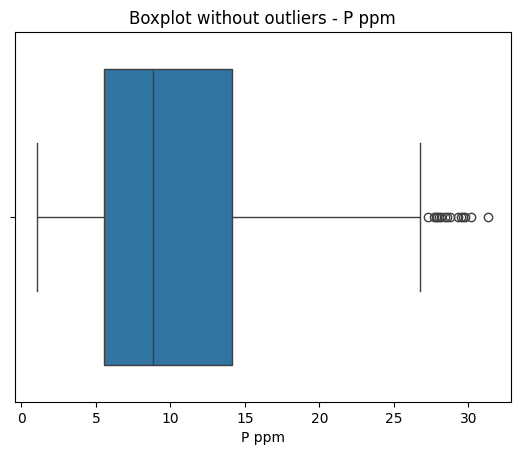

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
5      29.2    46.8    24.0  6.504     0.349  0.943973     0.00   6.021505   
..      ...     ...     ...    ...       ...       ...      ...        ...   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

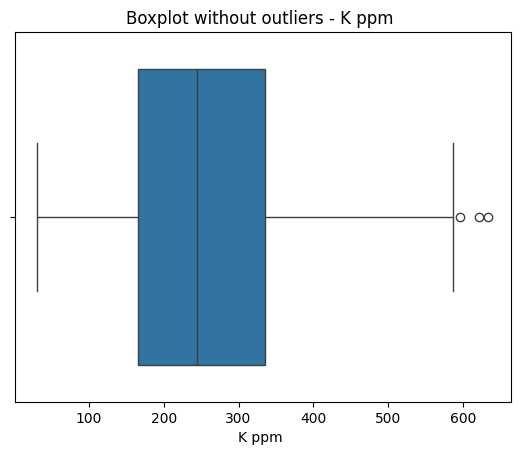

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
1      54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
..      ...     ...     ...    ...       ...       ...      ...        ...   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

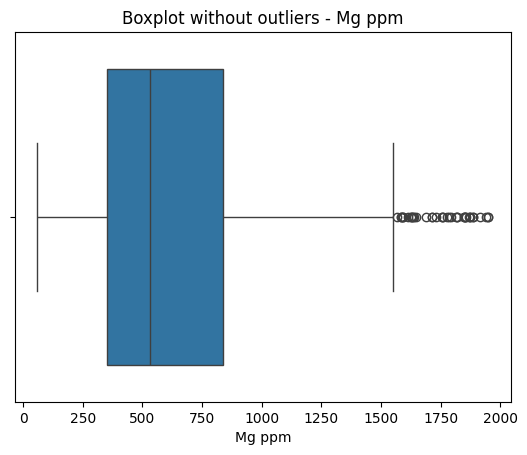

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
1      54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
..      ...     ...     ...    ...       ...       ...      ...        ...   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

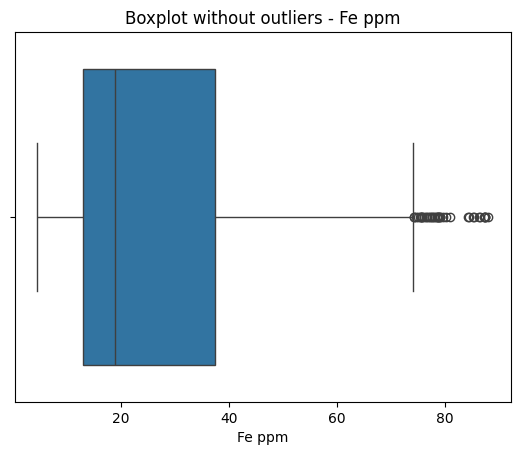

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
1      54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
5      29.2    46.8    24.0  6.504     0.349  0.943973     0.00   6.021505   
..      ...     ...     ...    ...       ...       ...      ...        ...   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

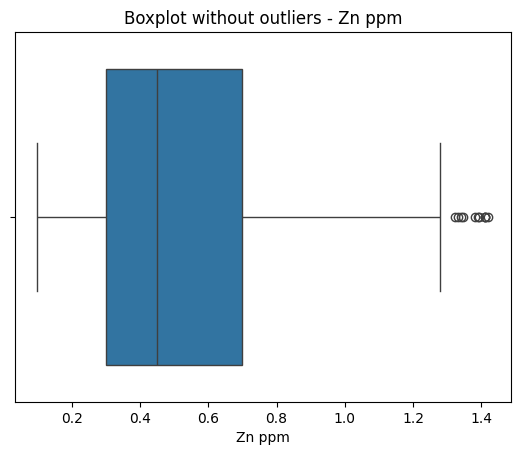

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
5      29.2    46.8    24.0  6.504     0.349  0.943973     0.00   6.021505   
6      37.2    34.8    28.0  6.466     0.975  2.358052     0.00  35.555556   
7      26.8    47.2    26.0  5.696     0.210  1.703664     0.00   4.784946   
..      ...     ...     ...    ...       ...       ...      ...        ...   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

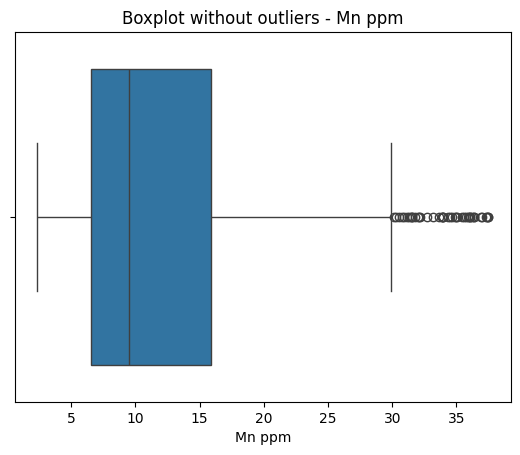

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
1      54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
..      ...     ...     ...    ...       ...       ...      ...        ...   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

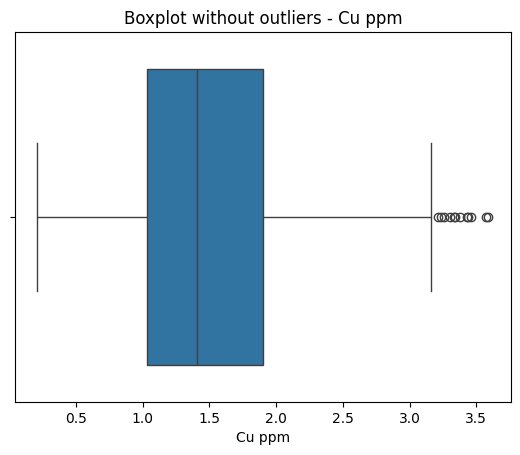

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
1      54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
..      ...     ...     ...    ...       ...       ...      ...        ...   
775    44.0    34.0    22.0  7.720     0.430  1.420000    27.00   4.320000   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

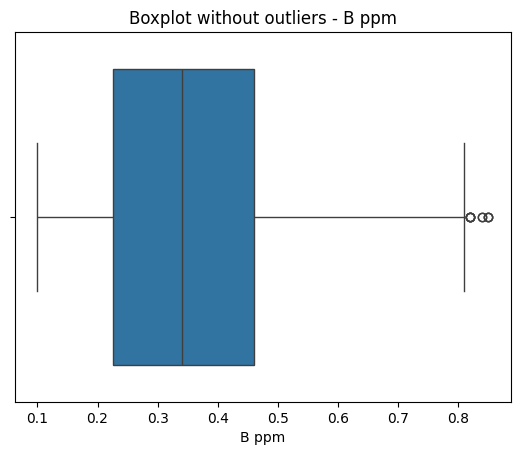

     Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
1      54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2      28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3      58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4      33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
..      ...     ...     ...    ...       ...       ...      ...        ...   
776    26.0    46.0    28.0  6.720     0.454  2.080000     0.00   7.660000   
777    40.0    28.0    32.0  7.790     0.343  1.380000    30.00   5.200000   
778    34.0    28.0    38.0  7.630     1.135  1.870000    24.30  17.130000   
779    16.0    38.0    46.0  7.730     0.393  1.720000    46.30   3.920000   
780    20.0    34.0    46.0  7.800     0.388  2.660000    36.30  10.350000   

         P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm 

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
column_names = ['Sand %', 'Clay %', 'Silt %', 'pH', 'EC mS/cm', 'O.M. %', 'CACO3 %', 'N_NO3 ppm', 'P ppm','K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm', 'Cu ppm', 'B ppm']

def filter_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    k = 1.5
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

filtered_dfs = {}
for column_name in column_names:
    filtered_dfs[column_name] = filter_outliers(df, column_name)

for column_name, df_filtered in filtered_dfs.items():
    sns.boxplot(data=df_filtered, x=column_name)
    plt.title(f'Boxplot without outliers - {column_name}')
    plt.show()
    print(df_filtered)

In [11]:
df_filtered.describe()

,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,31.563109,35.086693,33.350198,7.145777,0.445069,2.010353,13.399236,11.324913,13.243642,291.310935,821.320158,30.747110,0.653122,15.713002,2.009157,0.360958
std,10.954774,11.257955,8.297375,0.887625,0.285676,0.601954,13.297150,10.214635,13.111045,185.985589,745.334931,25.271643,0.646511,15.137755,2.473430,0.171571
min,10.000000,6.000000,14.000000,4.490000,0.137000,0.370000,0.000000,0.180000,1.070000,31.000000,60.000000,4.630000,0.100000,2.380000,0.210000,0.100000
25%,24.000000,28.000000,28.000000,6.695000,0.339000,1.590000,1.900000,5.280000,5.680000,168.500000,364.000000,13.255000,0.306500,6.748500,1.070000,0.225000
50%,30.000000,36.000000,32.000000,7.550000,0.402000,1.960000,8.710000,8.720000,9.390000,254.000000,568.000000,19.760000,0.476000,10.090000,1.468000,0.340000
75%,39.000000,44.000000,38.000000,7.780000,0.493500,2.360000,22.000000,14.115000,15.250000,354.500000,997.500000,41.890000,0.760000,18.680000,2.085000,0.460000
max,70.000000,64.000000,68.000000,8.200000,5.621000,4.980000,77.600000,102.813514,142.100000,1665.000000,4836.000000,187.940000,7.090000,189.210000,33.910000,0.850000


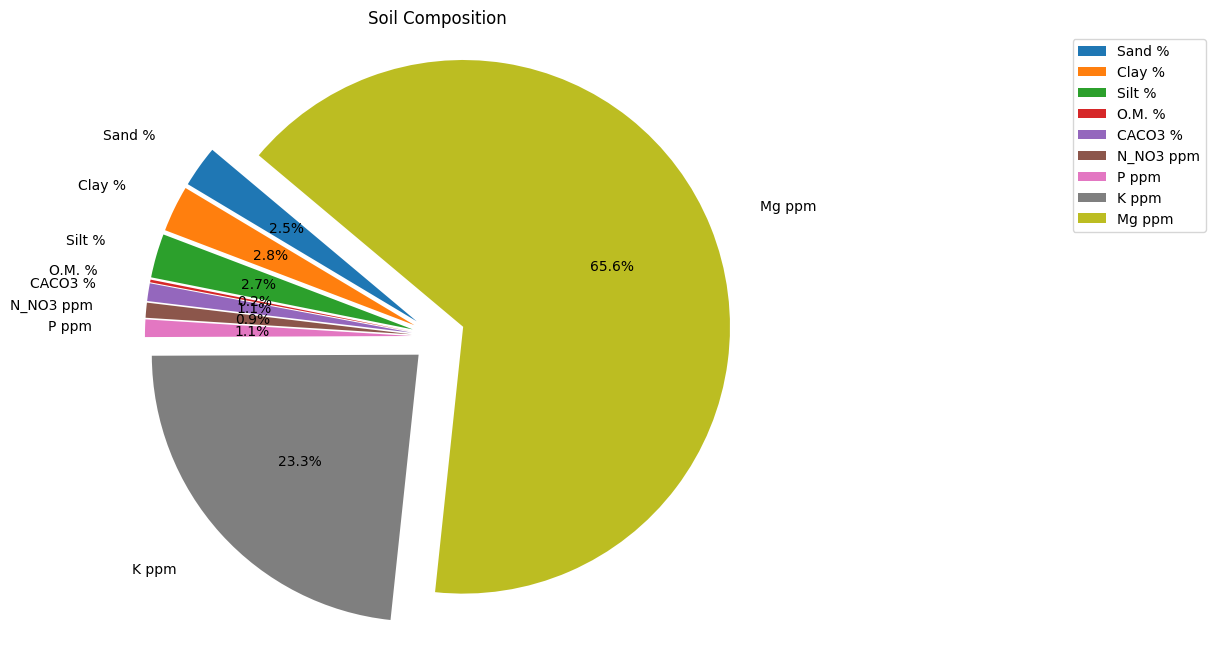

In [12]:
# Pie Chart
# Extract values for the pie chart
labels = ['Sand %', 'Clay %', 'Silt %','O.M. %','CACO3 %','N_NO3 ppm','P ppm','K ppm ','Mg ppm']
sizes = df_filtered[['Sand %', 'Clay %', 'Silt %','O.M. %','CACO3 %','N_NO3 ppm','P ppm','K ppm ','Mg ppm']].sum().values
explode = [0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,explode=explode,labeldistance=1.2)
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.title('Soil Composition')
plt.axis('equal')
plt.show()

<ipython-input-13-f33be41bdb08>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette='husl')


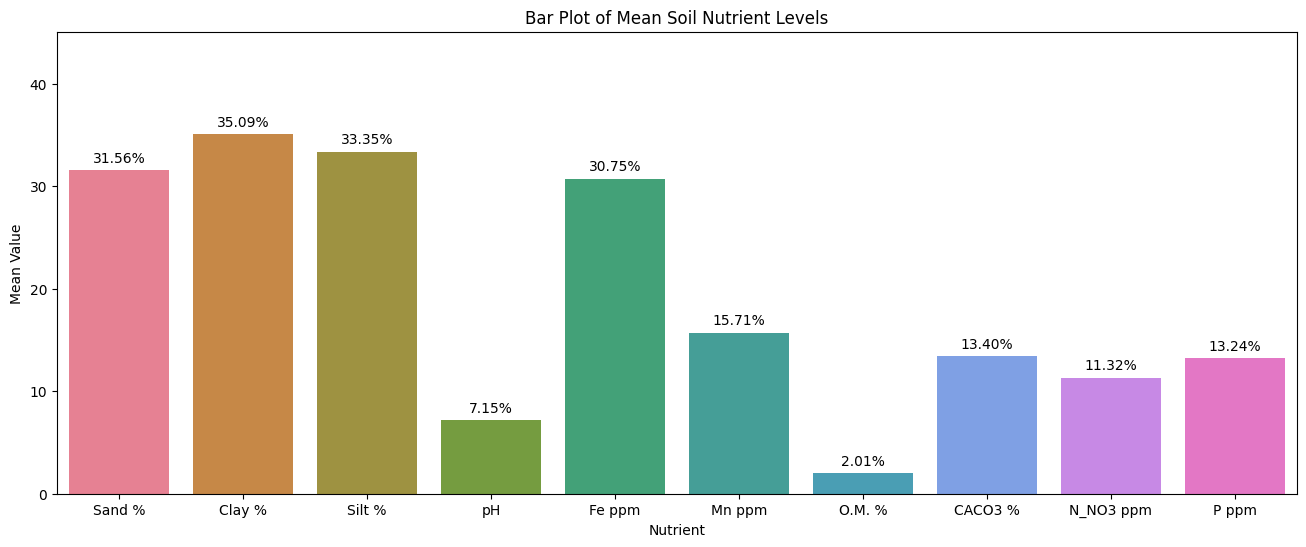

In [13]:
# Create a bar plot
plt.figure(figsize=(16, 6))

# Calculate the mean values
mean_values = df_filtered[['Sand %','Clay %','Silt %','pH','Fe ppm','Mn ppm','O.M. %','CACO3 %','N_NO3 ppm','P ppm']].mean()

# Create a bar plot using mean values
sns.barplot(x=mean_values.index, y=mean_values.values, palette='husl')

# Bar Plot of Mean Soil Nutrient Levels
plt.title('Bar Plot of Mean Soil Nutrient Levels')
plt.xlabel('Nutrient')
plt.ylabel('Mean Value')
plt.ylim(0, max(mean_values.values) + 10)  # Adjust the y-axis limit for better visualization

# Annotate the bars with mean values
for index, value in enumerate(mean_values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')
plt.show()


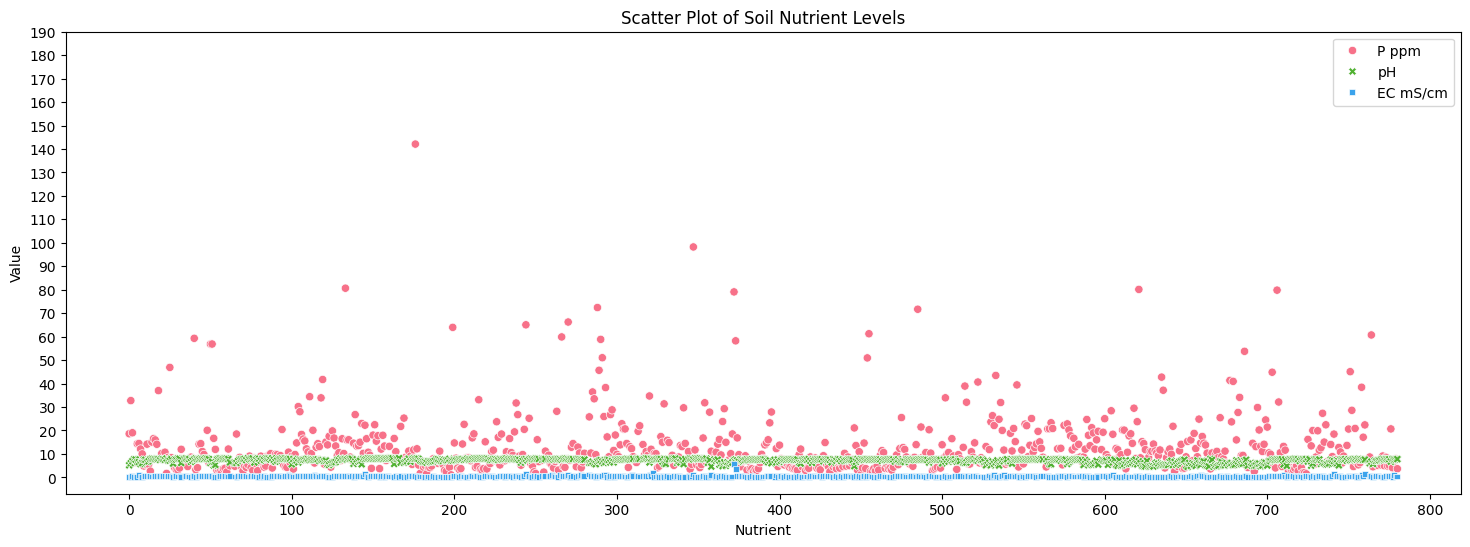

In [14]:
# Create a scatter plot
plt.figure(figsize=(18,6 ))
sns.scatterplot(data=df_filtered[['P ppm','pH','EC mS/cm']], palette='husl')
plt.title('Scatter Plot of Soil Nutrient Levels')
plt.xlabel('Nutrient')
plt.ylabel('Value')
plt.yticks([i for i in range(0, 200, 10)])
plt.show()

<ipython-input-15-8da2a7050a6b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='Sand %', palette='husl')


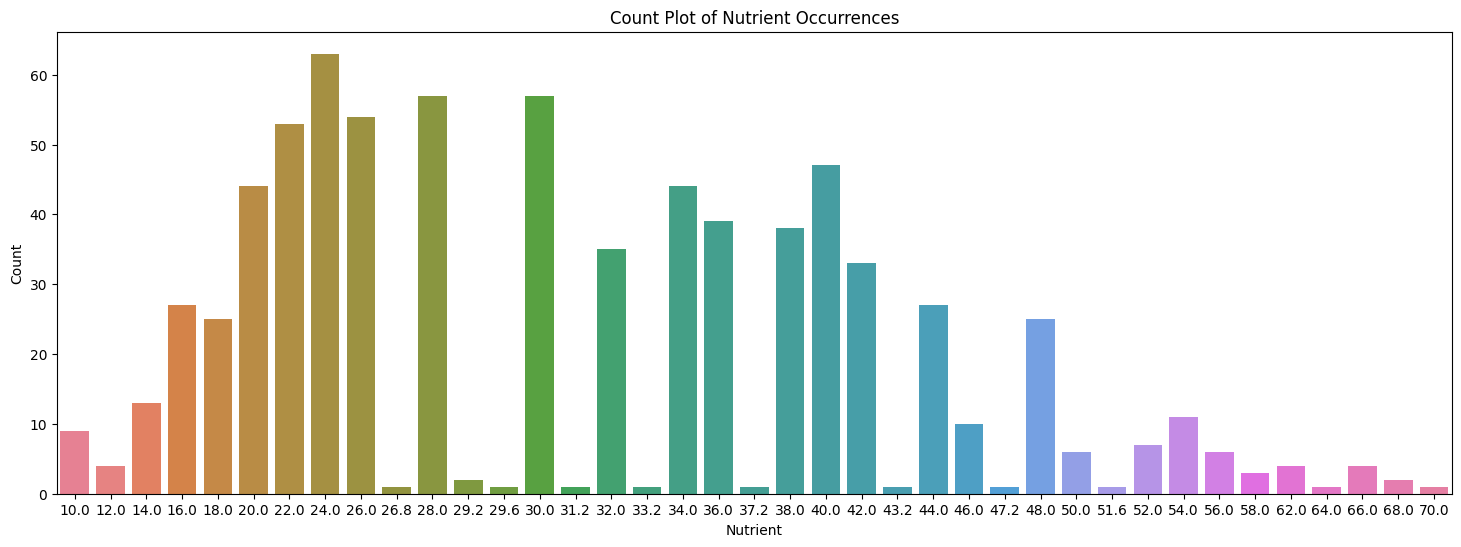

In [15]:
# Creating a count plot
plt.figure(figsize=(18, 6))
sns.countplot(data=df_filtered, x='Sand %', palette='husl')
plt.title('Count Plot of Nutrient Occurrences')
plt.xlabel('Nutrient')
plt.ylabel('Count')
plt.show()

<Axes: >

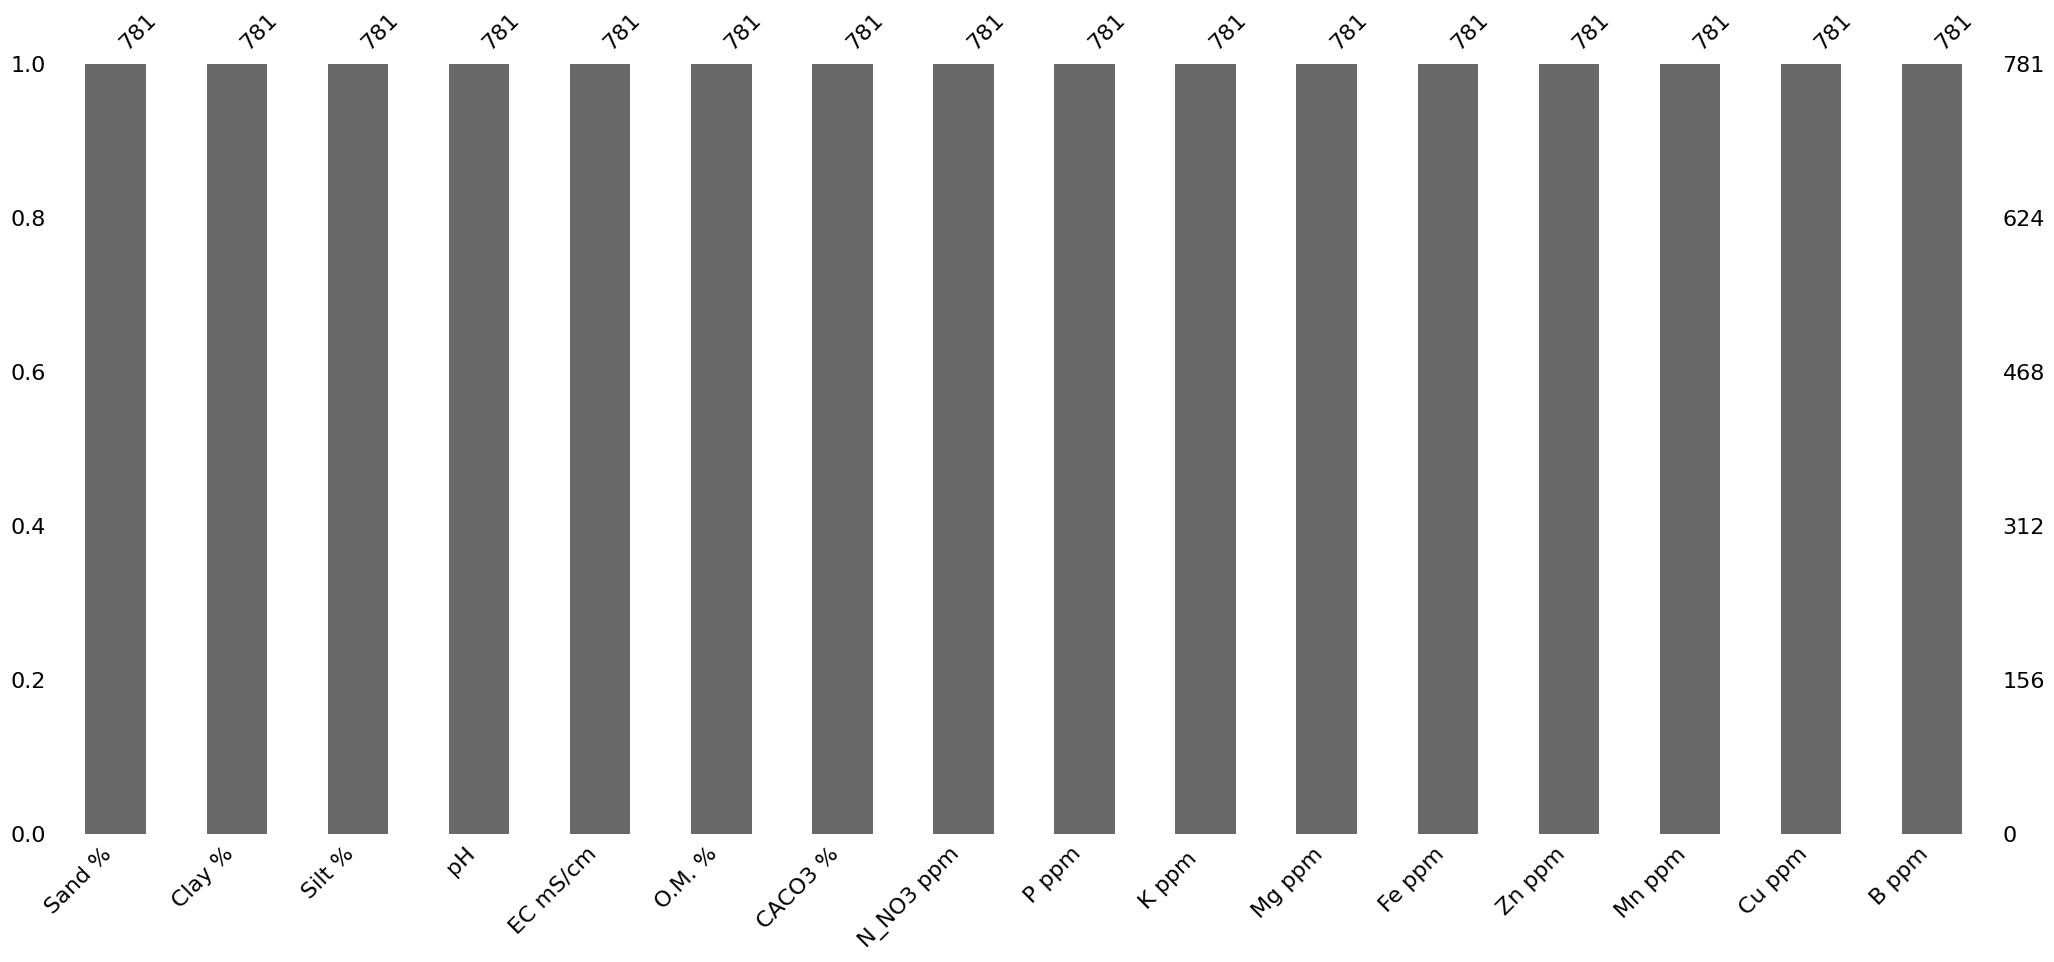

In [16]:
import missingno as msno
msno.bar(df)

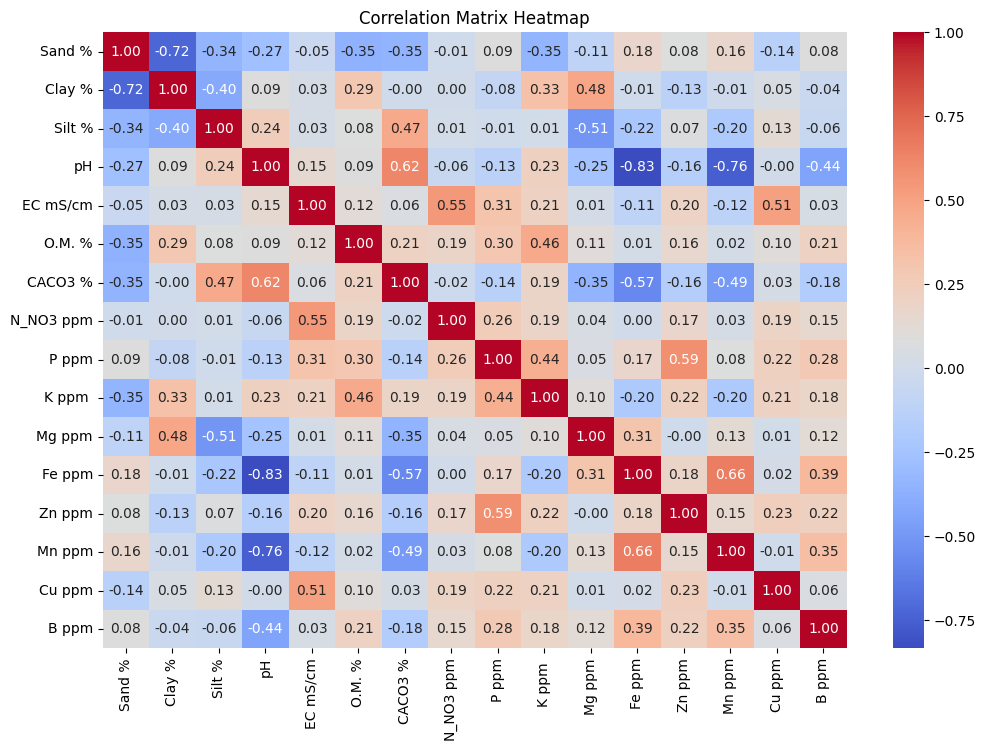

In [17]:
# Create a Correlation Matrix Heatmap
correlation_matrix = df_filtered.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [18]:
data_encoded = pd.get_dummies(df_csv, drop_first=True)

In [19]:
# Assuming you want to predict 'pH' based on other features.
# You can change the 'y_column' to predict a different variable.

y_column = 'pH'
x_columns = [col for col in df_filtered.columns if col != y_column]

X = df_filtered[x_columns]
y = df_filtered[y_column]

print(f"X (Factors): {x_columns}")
print(f"Y (Target): {y_column}")


X (Factors): ['Sand %', 'Clay %', 'Silt %', 'EC mS/cm', 'O.M. %', 'CACO3 %', 'N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm', 'Cu ppm', 'B ppm']
Y (Target): pH


In [20]:
X = data_encoded.drop(columns=['pH'])
y = data_encoded['pH']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# prompt: input x contains nan solve this

from sklearn.impute import SimpleImputer

# Assuming X contains NaN values
# Create a SimpleImputer object with a strategy to handle missing values (e.g., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean of the column

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Now you can use X_train_imputed and X_test_imputed in your model
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)


In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.1411757119517142
R² Score: 0.8452697464398112


In [27]:
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [-7.07896294e-04 -7.14279161e-04  2.88843823e-03 -2.17415907e-03
  3.04639259e-01  1.23883474e-01  8.41075927e-03 -3.88392157e-03
 -9.54060610e-04  1.30644315e-04 -2.74484641e-05 -1.74894081e-02
  2.81178783e-02 -1.66563833e-02 -2.89196074e-02 -4.13141169e-01]
Model Intercept: 7.9544982569890905
